## GLM model: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html

## family parameters: classification: multinomial, binomial; only for numeric prediction, not for classification: quasibinomial, gaussian, gamma, poisson, tweedie

In [1]:
import h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O cluster uptime:         1 day 3 hours 51 mins
H2O cluster timezone:       America/Los_Angeles
H2O data parsing timezone:  UTC
H2O cluster version:        3.28.0.1
H2O cluster version age:    21 days and 42 minutes
H2O cluster name:           H2O_from_python_yananli_b8uqhw
H2O cluster total nodes:    1
H2O cluster free memory:    1.633 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:       {u'http': None, u'https': None}
H2O internal security:      False
H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python version:             2.7.15 final
--------------------------  ------------------------------------------------------------------

In [3]:
url = "http://coursera.h2o.ai/data/smoking.csv"
smoking = h2o.import_file(url, destination_frame = "smoking")

In [ ]:
smoking.summary()

In [ ]:
smoking[:, "C3"].sum()

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [ ]:
x = [0, 1]
y = 4

In [ ]:
m = H2OGeneralizedLinearEstimator(
    family = "poisson",
    model_id = "smoking_p",
    #nfolds = 12,
    #fold_assignment = "Modulo"
)
m.train(x, y, smoking)

In [ ]:
m.model_performance()

In [ ]:
m.coef()

In [ ]:
m2 = H2OGeneralizedLinearEstimator(
    family = "poisson",
    model_id = "smoking_p2",
)
m2.train("C2", y, smoking)

In [ ]:
m2.model_performance()

In [ ]:
m2.coef()

## Naive Bayes is for classificaton only, cannot be applied to regression: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/naive-bayes.html

In [4]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train, test = iris.split_frame([0.8])

In [6]:
train.summary()

sepal_len sepal_wid petal_len petal_wid class 
 
 
 type real real real real enum 
 mins 4.3 2.0 1.0 0.1 
 mean 5.852 3.0512 3.7528 1.1808 
 maxs 7.9 4.2 6.9 2.5 
 sigma 0.854645748155 0.436927690186 1.78147166419 0.75804247051 
 zeros 0 0 0 0 
 missing 0 0 0 0 0 
 0 5.1 3.5 1.4 0.2 Iris-setosa 
 1 4.9 3.0 1.4 0.2 Iris-setosa 
 2 4.6 3.1 1.5 0.2 Iris-setosa 
 3 5.0 3.6 1.4 0.2 Iris-setosa 
 4 5.4 3.9 1.7 0.4 Iris-setosa 
 5 4.6 3.4 1.4 0.3 Iris-setosa 
 6 5.0 3.4 1.5 0.2 Iris-setosa 
 7 4.4 2.9 1.4 0.2 Iris-setosa 
 8 4.9 3.1 1.5 0.1 Iris-setosa 
 9 5.4 3.7 1.5 0.2 Iris-setosa

In [7]:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator

In [8]:
mNB = H2ONaiveBayesEstimator()
mNB.train(["sepal_len", "sepal_wid", "petal_len", "petal_wid"],"class", train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [9]:
mNB

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1578267636222_1


Model Summary: 


number_of_response_levels  min_apriori_probability  \
0                          3.0                    0.328   

   max_apriori_probability  
0                    0.336



ModelMetricsMultinomial: naivebayes
** Reported on train data. **

MSE: 0.0392551074372
RMSE: 0.198129017151
LogLoss: 0.127488999689
Mean Per-Class Error: 0.0563298490128

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


Iris-setosa  Iris-versicolor  Iris-virginica     Error     Rate
0         42.0              0.0             0.0  0.000000   0 / 42
1          0.0             39.0             3.0  0.071429   3 / 42
2          0.0              4.0            37.0  0.097561   4 / 41
3         42.0             43.0            40.0  0.056000  7 / 125


Top-3 Hit Ratios: 


k  hit_ratio
0  1      0.944
1  2      1.000
2  3      1.000

In [10]:
mNB.model_performance(test)


ModelMetricsMultinomial: naivebayes
** Reported on test data. **

MSE: 0.00249782757975
RMSE: 0.0499782710761
LogLoss: 0.015592223637
Mean Per-Class Error: 0.0

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


Iris-setosa  Iris-versicolor  Iris-virginica  Error    Rate
0          8.0              0.0             0.0    0.0   0 / 8
1          0.0              8.0             0.0    0.0   0 / 8
2          0.0              0.0             9.0    0.0   0 / 9
3          8.0              8.0             9.0    0.0  0 / 25


Top-3 Hit Ratios: 


k  hit_ratio
0  1        1.0
1  2        1.0
2  3        1.0

In [11]:
mNB2 = H2ONaiveBayesEstimator(laplace = 2)
mNB2.train(["sepal_len", "sepal_wid", "petal_len", "petal_wid"],"class", train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [12]:
mNB2.model_performance(test)


ModelMetricsMultinomial: naivebayes
** Reported on test data. **

MSE: 0.00250167906334
RMSE: 0.0500167878151
LogLoss: 0.0156019805615
Mean Per-Class Error: 0.0

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


Iris-setosa  Iris-versicolor  Iris-virginica  Error    Rate
0          8.0              0.0             0.0    0.0   0 / 8
1          0.0              8.0             0.0    0.0   0 / 8
2          0.0              0.0             9.0    0.0   0 / 9
3          8.0              8.0             9.0    0.0  0 / 25


Top-3 Hit Ratios: 


k  hit_ratio
0  1        1.0
1  2        1.0
2  3        1.0

## Load and save models

In [ ]:
fname = h2o.save_model(m, "/path/to/")
m = h2o.load_model("/path/to/someid")

## Some data manipulation: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging.html

In [4]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"
data = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
data.summary()

Year Month DayofMonth DayOfWeek DepTime CRSDepTime ArrTime CRSArrTime UniqueCarrier FlightNum TailNum ActualElapsedTime CRSElapsedTime AirTime ArrDelay DepDelay Origin Dest Distance TaxiIn TaxiOut Cancelled CancellationCode Diverted CarrierDelay WeatherDelay NASDelay SecurityDelay LateAircraftDelay IsArrDelayed IsDepDelayed 
 
 
 type int int int int int int int int enum int enum int int int int int enum enum int int int int enum int int int int int int enum enum 
 mins 1987.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 16.0 17.0 14.0 -63.0 -16.0 11.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 mean 1997.5 1.40909090909 14.6010732639 3.82061485288 1345.84666138 1313.22286143 1504.63413038 1485.28916731 818.842989677 124.814529135 125.021562607 114.316111091 9.31711193698 10.0073906556 730.182190565 5.38136805953 14.1686341847 0.0246941652645 0.00247851198326 4.04780029106 0.289376469271 4.85503190418 0.0170155602821 7.62006045002 
 maxs 2008.0 10.0 31.0 7.0 2400.0 2359.0 2400.0 2359.0 3949.0 475.0 437.0 402.0 475.0 473.0 3365.0 128.0 254.0 1.0 1.0 369.0 201.0 323.0 14.0 373.0 
 sigma 6.34436090171 1.87471137134 9.17579042586 1.90501311913 465.340899124 476.251139993 484.347487904 492.750434123 777.404369164 73.9744416606 73.40159463 69.6363295151 29.8402219624 26.4388090429 578.43800823 4.20197993986 9.9050857472 0.155193141358 0.0497234872189 16.2057299045 4.41677989873 18.6197762215 0.403940182102 23.4875658741 
 zeros 0 0 0 0 0 569 0 569 0 0 0 0 1514 6393 0 623 557 42892 43869 7344 8840 7388 8914 7140 
 missing 0 0 0 0 1086 0 1195 0 0 0 32 1195 13 16649 1195 1086 0 0 35 16026 16024 0 9774 0 35045 35045 35045 35045 35045 0 0 
 0 1987.0 10.0 14.0 3.0 741.0 730.0 912.0 849.0 PS 1451.0 NA 91.0 79.0 nan 23.0 11.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan YES YES 
 1 1987.0 10.0 15.0 4.0 729.0 730.0 903.0 849.0 PS 1451.0 NA 94.0 79.0 nan 14.0 -1.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan YES NO 
 2 1987.0 10.0 17.0 6.0 741.0 730.0 918.0 849.0 PS 1451.0 NA 97.0 79.0 nan 29.0 11.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan YES YES 
 3 1987.0 10.0 18.0 7.0 729.0 730.0 847.0 849.0 PS 1451.0 NA 78.0 79.0 nan -2.0 -1.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan NO NO 
 4 1987.0 10.0 19.0 1.0 749.0 730.0 922.0 849.0 PS 1451.0 NA 93.0 79.0 nan 33.0 19.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan YES YES 
 5 1987.0 10.0 21.0 3.0 728.0 730.0 848.0 849.0 PS 1451.0 NA 80.0 79.0 nan -1.0 -2.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan NO NO 
 6 1987.0 10.0 22.0 4.0 728.0 730.0 852.0 849.0 PS 1451.0 NA 84.0 79.0 nan 3.0 -2.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan YES NO 
 7 1987.0 10.0 23.0 5.0 731.0 730.0 902.0 849.0 PS 1451.0 NA 91.0 79.0 nan 13.0 1.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan YES YES 
 8 1987.0 10.0 24.0 6.0 744.0 730.0 908.0 849.0 PS 1451.0 NA 84.0 79.0 nan 19.0 14.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan YES YES 
 9 1987.0 10.0 25.0 7.0 729.0 730.0 851.0 849.0 PS 1451.0 NA 82.0 79.0 nan 2.0 -1.0 SAN SFO 447.0 nan nan 0.0 NA 0.0 nan nan nan nan nan YES NO

In [ ]:
# data["xxx"] = data["xxx"].asfactor()
# data["xxx"] = data["xxx"].asnumeric()

In [15]:
data["AirTime"].mean()

[114.31611109078231]

In [16]:
data["AirTime"].summary()

AirTime 
 
 
 type int 
 mins 14.0 
 mean 114.316111091 
 maxs 402.0 
 sigma 69.6363295151 
 zeros 0 
 missing 16649 
 0 nan 
 1 nan 
 2 nan 
 3 nan 
 4 nan 
 5 nan 
 6 nan 
 7 nan 
 8 nan 
 9 nan

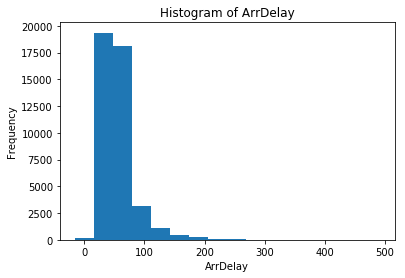

In [19]:
data["ArrDelay"].hist()

In [24]:
(data["ArrDelay"] > 360).any()

True

In [32]:
(data["ArrDelay"] < 480).all() ### have to remove NA

False

In [33]:
data["UniqueCarrier"].grep("[C-E]")

C1 
 
 
 17991 
 17992 
 17993 
 17994 
 17995 
 17996 
 17997 
 17998 
 17999 
 18000

In [35]:
data["UniqueCarrier"][data["UniqueCarrier"].grep("[C-E]",output_logical = True)]

UniqueCarrier 
 
 
 DL 
 DL 
 DL 
 DL 
 DL 
 DL 
 DL 
 DL 
 DL 
 DL

In [37]:
data[["ArrDelay", "DepDelay", "AirTime"]].cor(na_rm = True)

ArrDelay0 DepDelay0 AirTime0 
 
 
 1 0.907564 0.0836881 
 0.907564 1 0.0619647 
 0.0836881 0.0619647 1

In [5]:
train, valid, test = data.split_frame([0.8, 0.1], seed = 123)

In [6]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

35255/4272/4451


In [7]:
train2 = data[1:train.nrows, :]
train2 = h2o.assign(train2, "first35255")

In [8]:
h2o.ls() # check all dataset in H2O

key
0                    GLM_model_python_1578267636222_3
1   Grid_GLM_py_40_sid_80fa_model_python_157826763...
2   Grid_GLM_py_40_sid_80fa_model_python_157826763...
3   Grid_GLM_py_40_sid_80fa_model_python_157826763...
4   Grid_GLM_py_40_sid_80fa_model_python_157826763...
5   Grid_GLM_py_40_sid_80fa_model_python_157826763...
6   Grid_GLM_py_40_sid_80fa_model_python_157826763...
7   Grid_GLM_py_40_sid_80fa_model_python_157826763...
8   Grid_GLM_py_40_sid_80fa_model_python_157826763...
9   Grid_GLM_py_40_sid_80fa_model_python_157826763...
10  Grid_GLM_py_40_sid_80fa_model_python_157826763...
11  Grid_GLM_py_40_sid_80fa_model_python_157826763...
12  Grid_GLM_py_40_sid_80fa_model_python_157826763...
13  Grid_GLM_py_40_sid_80fa_model_python_157826763...
14  Grid_GLM_py_40_sid_80fa_model_python_157826763...
15  Grid_GLM_py_40_sid_80fa_model_python_157826763...
16  Grid_GLM_py_40_sid_80fa_model_python_157826763...
17  Grid_GLM_py_40_sid_80fa_model_python_157826763...
18  Grid_GLM_py_40_sid_80fa_model_python_157826763...
19  Grid_GLM_py_40_sid_80fa_model_python_157826763...
20  Grid_GLM_py_40_sid_80fa_model_python_157826763...
21  Grid_GLM_py_40_sid_80fa_model_python_157826763...
22  Grid_GLM_py_40_sid_80fa_model_python_157826763...
23  Grid_GLM_py_40_sid_80fa_model_python_157826763...
24  Grid_GLM_py_40_sid_80fa_model_python_157826763...
25  Grid_GLM_py_40_sid_80fa_model_python_157826763...
26            NaiveBayes_model_python_1578267636222_1
27            NaiveBayes_model_python_1578267636222_2
28                             allyears2k_headers.hex
29                            allyears2k_headers1.hex
..                                                ...
64  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
65  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
66  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
67  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
68  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
69  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
70  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
71  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
72  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
73  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
74  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
75  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
76  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
77  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
78  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
79  modelmetrics_Grid_GLM_py_40_sid_80fa_model_pyt...
80  modelmetrics_NaiveBayes_model_python_157826763...
81  modelmetrics_NaiveBayes_model_python_157826763...
82  modelmetrics_NaiveBayes_model_python_157826763...
83  modelmetrics_NaiveBayes_model_python_157826763...
84                                     py_34_sid_80fa
85                                     py_35_sid_80fa
86                                     py_36_sid_80fa
87                                     py_37_sid_80fa
88                                      py_3_sid_8368
89                                     py_40_sid_80fa
90                                     py_41_sid_80fa
91                                     py_42_sid_80fa
92                                      py_4_sid_8368
93                                      py_5_sid_8368

[94 rows x 1 columns]

In [9]:
data.ncol

31

In [10]:
dates = data[:, 0:4]

In [11]:
airports = data[:, ['Origin', 'Dest']]

In [12]:
dates.ncol

4

In [13]:
airports.ncol

2

## need same rows for cbind

In [14]:
a_and_d = airports.cbind(dates)

In [15]:
a_and_d.dim

[43978, 6]

## need same columns for rbind

In [16]:
restored_data = train.rbind([valid, test])

In [17]:
restored_data.dim

[43978, 31]

In [18]:
data.dim

[43978, 31]

In [19]:
restored_data[:, 0:4].head()

Year Month DayofMonth DayOfWeek 
 
 
 1987 10 14 3 
 1987 10 15 4 
 1987 10 17 6 
 1987 10 18 7 
 1987 10 19 1 
 1987 10 21 3 
 1987 10 22 4 
 1987 10 23 5 
 1987 10 26 1 
 1987 10 28 3

In [20]:
data[:, 0:4].head()

Year Month DayofMonth DayOfWeek 
 
 
 1987 10 14 3 
 1987 10 15 4 
 1987 10 17 6 
 1987 10 18 7 
 1987 10 19 1 
 1987 10 21 3 
 1987 10 22 4 
 1987 10 23 5 
 1987 10 24 6 
 1987 10 25 7

In [21]:
train[:, 0:4].head()

Year Month DayofMonth DayOfWeek 
 
 
 1987 10 14 3 
 1987 10 15 4 
 1987 10 17 6 
 1987 10 18 7 
 1987 10 19 1 
 1987 10 21 3 
 1987 10 22 4 
 1987 10 23 5 
 1987 10 26 1 
 1987 10 28 3

## Merge

In [23]:
import pandas as pd

A = h2o.H2OFrame(pd.DataFrame({'a': range(1,11), 'b': range(11,21), 'c': range(21,31)}), 
                 destination_frame = "A")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
A.as_data_frame()

a   b   c
0   1  11  21
1   2  12  22
2   3  13  23
3   4  14  24
4   5  15  25
5   6  16  26
6   7  17  27
7   8  18  28
8   9  19  29
9  10  20  30

In [26]:
import numpy as np

np.random.seed(123)
B = h2o.H2OFrame(pd.DataFrame({'a': np.random.randint(6,13,20), 'b': np.random.randint(6,13,20)}), 
                 destination_frame = "B")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [27]:
B.as_data_frame()

a   b
0   12   6
1   11   7
2   12   9
3    8  12
4   10  11
5    8  10
6   12   6
7    7   6
8    9  10
9    8   7
10   9   9
11   7   8
12  12  10
13   7   8
14   6  10
15   7   6
16  12  11
17   7   6
18   6   7
19  12   9

In [29]:
M = A.merge(B)

In [30]:
M.as_data_frame()

Empty DataFrame
Columns: [a, b, c]
Index: []

In [31]:
M = B.merge(A)

In [32]:
M.as_data_frame()

Empty DataFrame
Columns: [a, b, c]
Index: []

In [33]:
M = B.merge(A, by_x = "b", by_y = ["a"])

In [34]:
M.as_data_frame()

b   a  b.1   c
0    6  12   16  26
1    6  12   16  26
2    6   7   16  26
3    6   7   16  26
4    6   7   16  26
5    7  11   17  27
6    7   8   17  27
7    7   6   17  27
8    8   7   18  28
9    8   7   18  28
10   9  12   19  29
11   9   9   19  29
12   9  12   19  29
13  10   8   20  30
14  10   9   20  30
15  10  12   20  30
16  10   6   20  30

In [35]:
M = B.merge(A, by_y = "b", by_x = ["a"])

In [36]:
M.as_data_frame()

a   b  a.1   c
0  11   7    1  21
1  12   6    2  22
2  12   9    2  22
3  12   6    2  22
4  12  10    2  22
5  12  11    2  22
6  12   9    2  22

In [37]:
M = A.merge(B, by_y = "a", by_x = ["a"], all_x = True) # left join on "a"

In [38]:
M.as_data_frame()

a   b   c   b.1
0    1  11  21   NaN
1    2  12  22   NaN
2    3  13  23   NaN
3    4  14  24   NaN
4    5  15  25   NaN
5    6  16  26  10.0
6    6  16  26   7.0
7    7  17  27   6.0
8    7  17  27   8.0
9    7  17  27   8.0
10   7  17  27   6.0
11   7  17  27   6.0
12   8  18  28  12.0
13   8  18  28  10.0
14   8  18  28   7.0
15   9  19  29  10.0
16   9  19  29   9.0
17  10  20  30  11.0

In [39]:
M = A.merge(B, all_y = True) #right join

In [40]:
M.as_data_frame()

a   b   c
0    6   7 NaN
1    6  10 NaN
2    7   6 NaN
3    7   6 NaN
4    7   6 NaN
5    7   8 NaN
6    7   8 NaN
7    8   7 NaN
8    8  10 NaN
9    8  12 NaN
10   9   9 NaN
11   9  10 NaN
12  10  11 NaN
13  11   7 NaN
14  12   6 NaN
15  12   6 NaN
16  12   9 NaN
17  12   9 NaN
18  12  10 NaN
19  12  11 NaN

## Grid search for parameter tuning: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

In [38]:
import h2o.grid

In [39]:
train, valid, test = data.split_frame([0.8, 0.1], seed = 123)

In [40]:
y = "IsArrDelayed"
ignoreFields = ["ArrDelay", "DepDelay", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "IsDepDelayed", "IsArrDelayed", "ActualElapsedTime"]
xAll = [i for i in train.names if i not in ignoreFields]
xLikely = ["Month", "DayOfWeek", "UniqueCarrier", "Origin", "Dest", "Distance", "Cancelled", "Diverted"]

In [41]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [42]:
m_def = H2OGeneralizedLinearEstimator(family = "binomial")
m_def.train(xAll, y, train, validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [43]:
m_def.logloss(valid = True)

0.6145689662556074

In [45]:
g = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(family = "binomial", lambda_search = True),
    hyper_params = {"alpha": [x * 0.01 for x in range(0, 100)]},
    search_criteria = {"strategy": "RandomDiscrete", "max_models": 8, "max_runtime_secs": 30}
)
g.train(xAll, y, train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [46]:
g

                     alpha  \
0                   [0.85]   
1                   [0.74]   
2                   [0.62]   
3                   [0.49]   
4    [0.41000000000000003]   
5                    [0.3]   
6                   [0.25]   
7                   [0.24]   

                                                      model_ids  \
0  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_7   
1  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_1   
2  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_4   
3  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_3   
4  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_8   
5  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_2   
6  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_5   
7  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_6   

              logloss  
0  0.5863455570431854  
1  0.5871866196835029  
2  0.5882188925135385  
3   0.589496094664613  
4  0.

In [50]:
g2 = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(family = "binomial", lambda_search = True),
    hyper_params = {"alpha": [0, 0.2, 0.4, 0.5, 0.6, 0.8, 0.99]},
    search_criteria = {"strategy": "Cartesian"}
)
g2.train(xLikely, y, train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [51]:
g2

      alpha                                                      model_ids  \
0     [0.0]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_1   
1     [0.2]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_2   
2     [0.4]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_3   
3     [0.5]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_4   
4     [0.6]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_5   
5     [0.8]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_6   
6    [0.99]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_7   

              logloss  
0  0.6405356965885607  
1  0.6405445477707639  
2  0.6406087355878671  
3  0.6406415507786855  
4   0.640650641941224  
5  0.6406784529092207  
6  0.6407189840607583  
